データ条件
- 高速走行中のデータだが、停車もデータとしてあり

やりたいこと
- まず、全データの可視化と各変数が何を表していそうか理解するノートブック
- そもそも高速は何キロ速度が必要なのか（基準は自分で独自に決めて良い、n%は　nkm~nkmに収まるからなど）
- 上記を満たすにはアクセルの踏む力はどの程度必要なのか
- 上記を満たすには停車発進の何分程度は自力走行に頼らないといけないか
- 速度とステアリング角度の関係、高速自動走行するまでなら何度まで対応しないといけないか（95%満たす閾値は？）

設定を決めれないとどうしようもないときは自分でこう、と設定を決めてしまっていい

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../2016-02-11--21-32-47.csv/2016-02-11--21-32-47.csv', 
                 index_col=0)

In [3]:
df.head()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_compass_x,fiber_compass_y,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.114427,0.134096,...,795.000000,4093.000000,4094.000000,4086.000000,788.000000,4077.000000,96.000000,9.000000,12.000000,4077.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228853,0.268192,...,789.257336,4074.814898,4092.085779,4086.000000,781.300225,4072.214447,98.871332,9.957111,21.571107,4067.428893
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228853,0.268192,...,789.230567,4087.000000,4090.000000,4085.000000,788.000000,4066.000000,98.000000,9.000000,14.000000,4061.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228853,0.268192,...,796.000000,4085.000000,8.000000,4086.000000,793.067729,4063.483068,86.033864,9.550797,9.864543,4061.932271
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.228853,0.268192,...,791.294550,2322.822546,0.000000,4086.136966,794.157584,4068.958765,103.232698,11.000000,5.410899,4068.821799


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426596 entries, 0 to 426595
Data columns (total 77 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   blinker             426596 non-null  float64
 1   brake               426596 non-null  float64
 2   brake_computer      426596 non-null  float64
 3   brake_user          426596 non-null  float64
 4   cam1_ptr            426596 non-null  float64
 5   cam2_ptr            426596 non-null  float64
 6   camphone_ptr        426596 non-null  float64
 7   car_accel           426596 non-null  float64
 8   fiber_compass_x     426596 non-null  float64
 9   fiber_compass_y     426596 non-null  float64
 10  fiber_compass_z     426596 non-null  float64
 11  fiber_temperature   426596 non-null  float64
 12  gas                 426596 non-null  float64
 13  gear_choice         426596 non-null  float64
 14  gps_1_fix           426596 non-null  float64
 15  gps_2_fix           426596 non-nul

# 各変数の可視化

## blinker

In [5]:
df['blinker'].describe()

count    426596.000000
mean          6.111801
std          10.159687
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max          68.000000
Name: blinker, dtype: float64

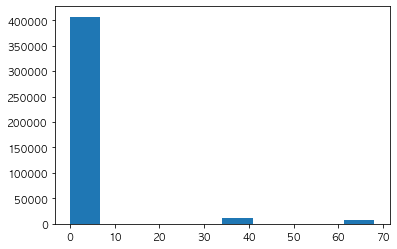

In [6]:
plt.hist(df["blinker"])
plt.show()

blinker=車のウインカーの点滅回数と考えるとほとんどの車両が直進しているように考えられる  
車線変更とかもそんなにしていない

## brake

In [7]:
df['brake'].describe()

count    426596.000000
mean         67.459832
std         896.478472
min         -64.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       63872.000000
Name: brake, dtype: float64

In [8]:
df["brake_computer"].describe()

count    426596.000000
mean          0.146306
std           8.869276
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         600.000000
Name: brake_computer, dtype: float64

In [9]:
df["brake_user"].describe()

count    426596.000000
mean         67.313527
std         896.439814
min         -64.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       63872.000000
Name: brake_user, dtype: float64

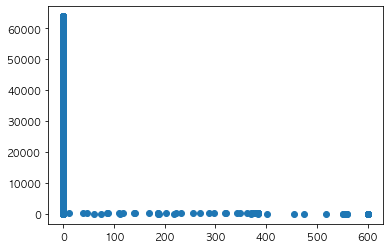

In [10]:
plt.scatter(df["brake_computer"],df["brake_user"])

あくまでcomputerのブレーキサポートはサポートでそもそもそんなに大きな影響は与えていなさそう  
user側でブレーキの値が最大値63872になっていたりしていて、外れ値が存在している？  
(データの説明のほうにはUser brake pedal depression [0-4095]とあり、最大値は4095になるはず？)  
そもそもminの-64っていう値が何なのか？

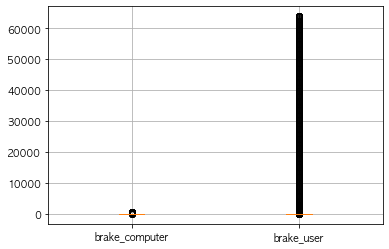

In [11]:
fig, ax = plt.subplots()
bp = ax.boxplot([df["brake_computer"],df["brake_user"]]) 
ax.set_xticklabels(["brake_computer", "brake_user"])
plt.grid() 
plt.show()

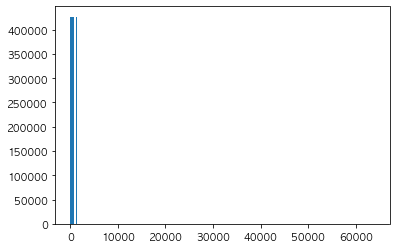

In [18]:
plt.bar(df["brake_user"], df["brake_user"].count())
plt.show()

そもそもブレーキほとんどしていないと考えられそう

## Camera frame

In [19]:
df['cam1_ptr'].describe()

count    426596.000000
mean      42642.889551
std       24625.645076
min           0.000000
25%       21317.000000
50%       42643.000000
75%       63969.000000
max       85295.000000
Name: cam1_ptr, dtype: float64

In [20]:
df['cam2_ptr'].describe()

count    426596.000000
mean      42646.877505
std       24628.027084
min           0.000000
25%       21319.000000
50%       42647.000000
75%       63975.000000
max       85303.000000
Name: cam2_ptr, dtype: float64

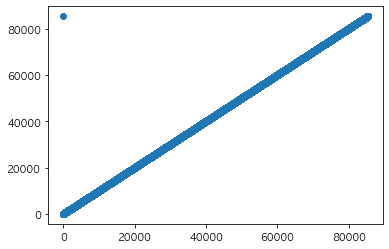

In [21]:
plt.scatter(df["cam1_ptr"],df["cam2_ptr"])

Camera1とCamera2の違いは何？  
とりあえずお互いのフレームインデックスと呼ばれるものが相関していることはわかる

## car accel

In [22]:
df['car_accel'].describe()

count    426596.000000
mean         -0.001884
std           0.482029
min          -3.107535
25%          -0.151163
50%           0.000000
75%           0.141300
max           4.757706
Name: car_accel, dtype: float64

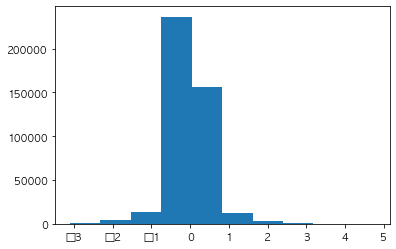

In [25]:
plt.hist(df["car_accel"])
plt.show()

追加の加速する（アクセルを踏む）ことは意外と少ない？  

## gear choise

In [27]:
df["gear_choice"].describe()

count    426596.000000
mean          7.528266
std           2.151670
min           0.000000
25%           7.000000
50%           8.000000
75%           8.000000
max          11.000000
Name: gear_choice, dtype: float64

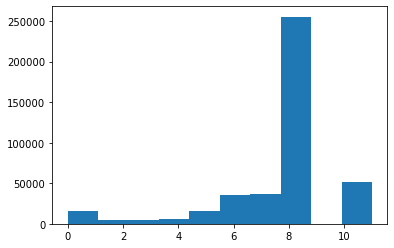

In [29]:
plt.hist(df["gear_choice"])
plt.show()

0- パーク／ニュートラル、10- リバース、11- ギアチェンジ中  
高速の運転中は基本的に8速で運転している人がほとんど



## post torque-converter

In [32]:
df["rpm_post_torque"].describe()

count    426596.000000
mean       1535.456993
std         446.178803
min           0.000000
25%        1370.228516
50%        1523.891576
75%        1819.696037
max        6530.970463
Name: rpm_post_torque, dtype: float64

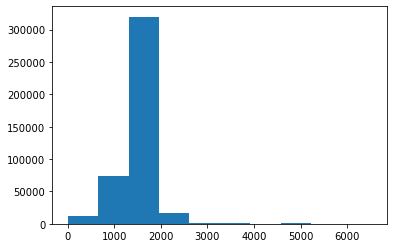

In [33]:
plt.hist(df["rpm_post_torque"])
plt.show()

## speed

In [34]:
df["speed"].describe()

count    426596.000000
mean         22.086444
std           8.611914
min          -1.100775
25%          16.836265
50%          24.418821
75%          26.809167
max          33.284215
Name: speed, dtype: float64

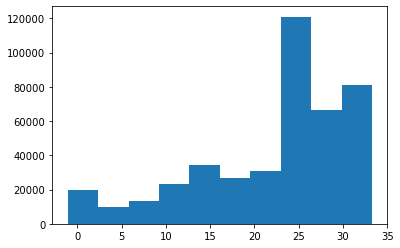

In [36]:
plt.hist(df["speed"])
plt.show()

In [37]:
df["speed_abs"].describe()

count    426596.000000
mean         22.087518
std           8.609160
min           0.000000
25%          16.836265
50%          24.418821
75%          26.809167
max          33.284215
Name: speed_abs, dtype: float64

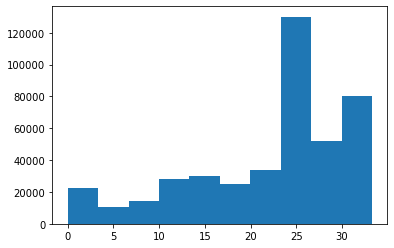

In [38]:
plt.hist(df["speed_abs"])
plt.show()

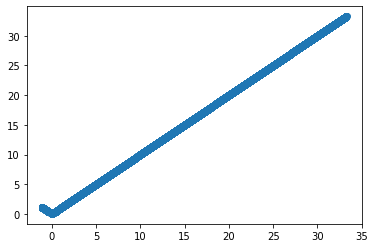

In [39]:
plt.scatter(df["speed"],df["speed_abs"])

値はm/s,変速後エンコーダから、ギアがReveseの時マイナス  
最低値がマイナスなのでバックしている車もいる？  
25m/sがボリュームゾーン  
時速換算すると時速90km/hで走っている車がほとんど  
少し以外なのは止まってる車も結構いそうということと、後退してる車もいること  
speedとspeed_absの違いは何?絶対値としてspeedを扱っているとかそういう感じ？

In [40]:
df["speed_fl"].describe()

count    426596.000000
mean         22.033527
std           8.595111
min           0.000000
25%          16.794127
50%          24.360880
75%          26.746618
max          33.255361
Name: speed_fl, dtype: float64

In [41]:
df["speed_fr"].describe()

count    426596.000000
mean         22.031961
std           8.587974
min           0.000000
25%          16.794479
50%          24.355267
75%          26.735245
max          33.217556
Name: speed_fr, dtype: float64

In [42]:
df["speed_rl"].describe()

count    426596.000000
mean         21.924487
std           8.552771
min           0.000000
25%          16.723264
50%          24.245886
75%          26.621985
max          33.068262
Name: speed_rl, dtype: float64

In [43]:
df["speed_rr"].describe()

count    426596.000000
mean         21.935973
std           8.550699
min           0.000000
25%          16.729753
50%          24.257848
75%          26.627154
max          33.070822
Name: speed_rr, dtype: float64

In [44]:
df["speed_fw"] = df["speed_fl"] + df["speed_fr"] / 2
df["speed_fw"].describe()

count    426596.000000
mean         33.049508
std          12.888980
min           0.000000
25%          25.194922
50%          36.533318
75%          40.115381
max          49.839053
Name: speed_fw, dtype: float64

In [45]:
df["speed_rw"] = df["speed_rl"] + df["speed_rr"] / 2
df["speed_rw"].describe()

count    426596.000000
mean         32.892473
std          12.827981
min           0.000000
25%          25.093977
50%          36.368666
75%          39.935389
max          49.590732
Name: speed_rw, dtype: float64

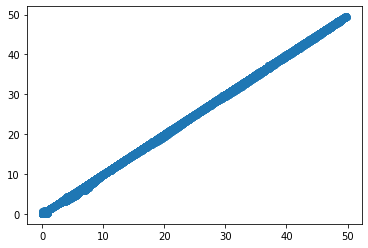

In [46]:
plt.scatter(df["speed_fw"],df["speed_rw"])

扱っている単位がm/sなのであれば加速度も一応算出できる？  
仮にできたとして、加速度で比較すれば4WDが多いのか、2WDが多いかとかの判断ができるようになる？

## standstill

In [47]:
df["standstill"].describe()

count    426596.000000
mean          0.966052
std           0.181095
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: standstill, dtype: float64

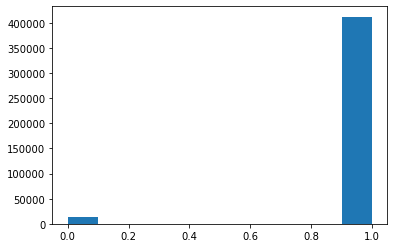

In [48]:
plt.hist(df["standstill"])
plt.show()

基本的にどの車も動いてる  
止まってる車だけで分析したら何か見えるものはあるかも？

## steering

In [50]:
df["steering_angle"].describe()

count    426596.000000
mean        -10.660334
std         326.499485
min       -5102.000000
25%         -17.000000
50%          -9.000000
75%           2.000000
max        3381.000000
Name: steering_angle, dtype: float64

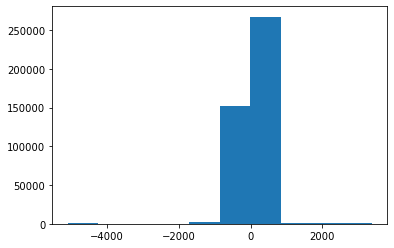

In [51]:
plt.hist(df["steering_angle"])
plt.show()

In [52]:
df["steering_torque"].describe()

count    426596.000000
mean          0.003078
std          18.085393
min        -483.395530
25%          -0.630655
50%           0.000000
75%           0.812446
max         512.000000
Name: steering_torque, dtype: float64

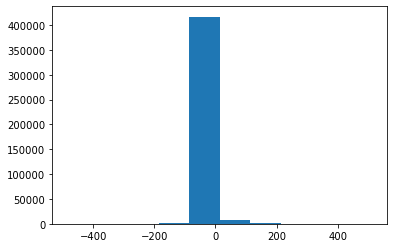

In [53]:
plt.hist(df["steering_torque"])
plt.show()

トルクの説明文がdeg/s、名前はともかく、これはステアリングアングルのレートですとなっている  
トルクのほうがタイヤが左右に向くときの秒速？でアングルのほうがハンドルをどれくらい傾けたかとか？  

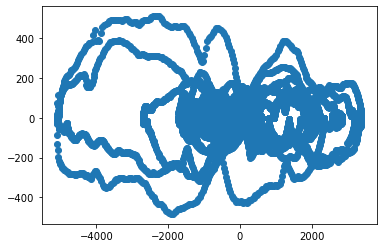

In [54]:
plt.scatter(df["steering_angle"], df["steering_torque"])

nanndakore

## times 

In [56]:
df["times"].describe()

count    426596.000000
mean       2132.975000
std        1231.478021
min           0.000000
25%        1066.487500
50%        2132.975000
75%        3199.462500
max        4265.950000
Name: times, dtype: float64

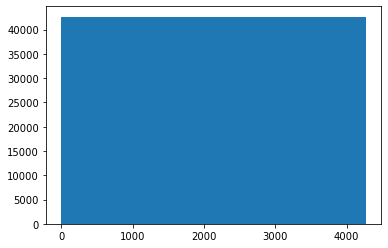

In [57]:
plt.hist(df["times"])
plt.show()

変数の説明のほうには秒数としか書かれていない  
運転開始してからの秒数とかそういうもの？